# Homework 2
*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment covers linear filters, convolution and correlation.

In [1]:
# Setup
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

## Part 1: Convolution (25 points)

In this section, you will implement two versions of convolution:
- `conv_nested`
- `conv_fast`

First, run the code cell below to load the image to work with.

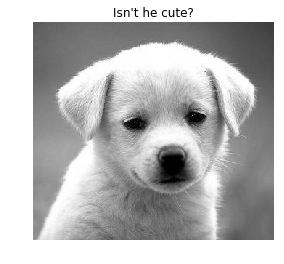

In [2]:
# Open image as grayscale
img = io.imread('dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.title("Isn't he cute?")
plt.show()

### 2.1 Naive Convolution (15 points)
Now, implement the function **`conv_nested`** and **`conv_nested_torch`** in **`filters.py`**. **`conv_nested`** is a naive implementation of convolution which uses 4 nested for-loops. It takes an image $f$ and a kernel $h$ as inputs and outputs the convolved image $(f*h)$ that has the same shape as the input image. This implementation should take a few seconds to run. As to **`conv_nested_torch`**, you'd better run 
**`pip install torch`** 
in cmd or conda environment to install PyTorch library.

*- Hint1: It may be easier to implement $(h*f)$*
*- Hint2: You must implement the **`conv_nested`** in **`filters.py`** by yourself with a **flip** operation you learned in the lecture. **It's different from the PyTorch's.***

We'll first test your `conv_nested` function on a simple input. And then you should use the convolution function in PyTorch library to implement `conv_nested_torch`. You can check the difference between the output of your implementation and the output of PyTorch's convolution function.

Your solution is correct!


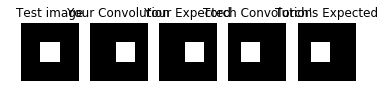

In [3]:
from filters import conv_nested, conv_nested_torch

# Simple convolution kernel.
kernel = np.array(
[
    [0,0,0],
    [0,0,1],
    [0,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image which flips the kernel
test_output = conv_nested(test_img, kernel)

# Run conv_nested_torch function on the test image
test_output_torch = conv_nested_torch(test_img, kernel)


# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[3:6, 4:7] = 1
expected_output_torch = np.zeros((9, 9))
expected_output_torch[3:6, 2:5] = 1

# Plot the test image
plt.set_cmap('gray') # set color map to gray
plt.subplot(1,5,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,5,2)
plt.imshow(test_output)
plt.title('Your Convolution')
plt.axis('off')

# Plot expected convolved image
plt.subplot(1,5,3)
plt.imshow(expected_output)
plt.title('Your Expected')
plt.axis('off')


# Plot torch convolved image
plt.subplot(1,5,4)
plt.imshow(test_output_torch)
plt.title('Torch Convolution')
plt.axis('off')

# Plot torch convolved image
plt.subplot(1,5,5)
plt.imshow(expected_output_torch)
plt.title('Torch\'s Expected')
plt.axis('off')

assert np.max(test_output - expected_output) < 1e-10, "Your solution is incorrect"
print("Your solution is correct!")

Now let's test your `conv_nested` function on a real image.

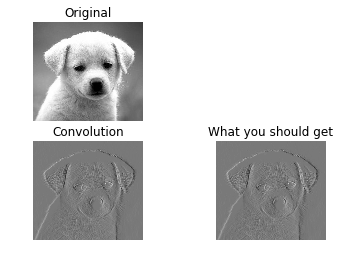

In [4]:
from filters import conv_nested

# Simple convolution kernel.
# Feel free to change the kernel to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_nested(img, kernel)

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convolved_dog.png', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

### 1.2 Fast Convolution (10 points)
Let us implement a more efficient version of convolution using array operations in numpy. As shown in the lecture, a convolution can be considered as a sliding window that computes sum of the pixel values weighted by the flipped kernel. The faster version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute weighted sum of the neighborhood at each pixel.

#### 1.2.1 Zero Padding (5 points)
First, implement the function **`zero_pad`** in **`filters.py`**.


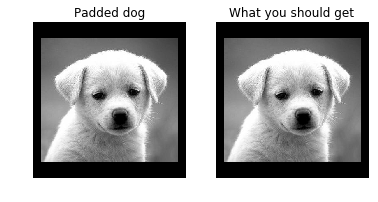

In [5]:
from filters import zero_pad

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

#### 1.2.2 Implement Fast Convolution (5 points)
Next, complete the function **`conv_fast`** in **`filters.py`** using `zero_pad`. Run the code below to compare the outputs by the two implementations. `conv_fast` should run noticeably faster than `conv_nested`.  


conv_nested: took 1.300687 seconds.
conv_fast: took 0.763037 seconds.


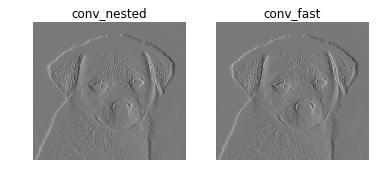

In [6]:
from filters import conv_fast

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

## Part2: Edge Detection (75 points)

This assignment covers Canny edge detector. **You must implement the functions in `edge.py`. You can use additional libraries or functions in Part 2 to help you solve questions, and these libraries or functions don't have to be provided by us or written by yourself.**

In [7]:
# Setup
import matplotlib.image as mpimg

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Canny Edge Detector
In this part, you are going to implement a Canny edge detector. The Canny edge detection algorithm can be broken down in to five steps:
1. Smoothing
2. Finding gradients
3. Non-maximum suppression
4. Double thresholding
5. Edge tracking by hysterisis

### 2.1 Smoothing (10 points)
#### Implementation (5 points)
We first smooth the input image by convolving it with a Gaussian kernel. The equation for a Gaussian kernel of size $(2k+1)\times(2k+1)$ is given by:

$$h_{ij}=\frac{1}{2\pi\sigma^2}\exp{\Bigl(-\frac{(i-k)^2+(j-k)^2}{2\sigma^2}\Bigr)}, 0\leq i,j < 2k+1$$

Implement **`gaussian_kernel`** in `edge.py` and run the code below.

In [8]:
from edge import conv, gaussian_kernel

# Define 3x3 Gaussian kernel with std = 1
kernel = gaussian_kernel(3, 1)
kernel_test = np.array(
    [[ 0.05854983, 0.09653235, 0.05854983],
     [ 0.09653235, 0.15915494, 0.09653235],
     [ 0.05854983, 0.09653235, 0.05854983]]
)

# Test Gaussian kernel
if not np.allclose(kernel, kernel_test):
    print('Incorrect values! Please check your implementation.')

Implement **`conv`** in `edge.py` and run the code below.

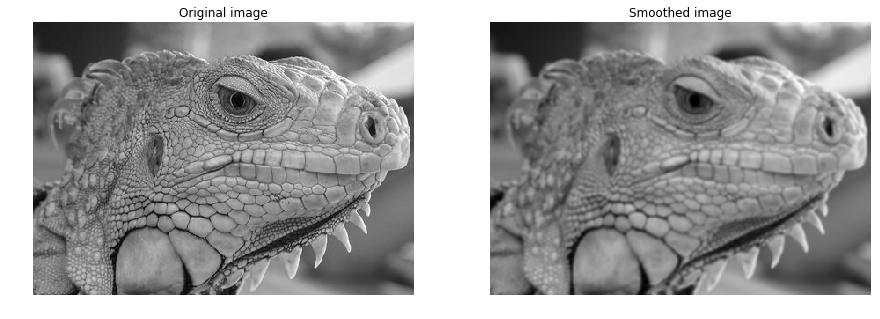

In [28]:
# Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

# Load image
img = io.imread('iguana.png', as_gray=True)

# Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

# Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(smoothed)
plt.title('Smoothed image')
plt.axis('off')

plt.show()

# print("smoothed image",smoothed)


#### Question (5 points)
What is the effect of changing kernel_size and sigma?

**Your Answer:** 
>当sigma保持不变时，将kernel_size调小，图像变得更加清晰；将kernel_size调大，图像变得更加模糊。这是因为当kernel_size减小时，计算新像素值时考虑更少的相邻像素，故图像更清晰；而如果kernel_size增大，则计算新像素值时考虑更多相邻像素，故图像更模糊。
>
>当kernel_size保持不变时，将sigma调小，图像变得更加清晰；将sigma调大，图像变得更加模糊。这是因为当sigma减小时，缩小了分布，故图像更清晰；而如果sigma增大，则扩大了分布，故图像更模糊。

### 2.2 Finding gradients (15 points)
The gradient of a 2D scalar function $I:\mathbb{R}^2\rightarrow{\mathbb{R}}$ in Cartesian coordinate is defined by:

$$\nabla{I(x,y)}=\bigl[\frac{\partial{I}}{\partial{x}},\frac{\partial{I}}{\partial{y}}\bigr],$$

where

$$
\frac{\partial{I(x,y)}}{\partial{x}}=\lim_{\Delta{x}\to{0}}\frac{I(x+\Delta{x},y)-I(x,y)}{\Delta{x}} \\
\frac{\partial{I(x,y)}}{\partial{y}}=\lim_{\Delta{y}\to{0}}\frac{I(x,y+\Delta{y})-I(x,y)}{\Delta{y}}.
$$

In case of images, we can approximate the partial derivatives by taking differences at one pixel intervals:

$$
\frac{\partial{I(x,y)}}{\partial{x}}\approx{\frac{I(x+1,y)-I(x-1,y)}{2}} \\
\frac{\partial{I(x,y)}}{\partial{y}}\approx{\frac{I(x,y+1)-I(x,y-1)}{2}}
$$

Note that the partial derivatives can be computed by convolving the image $I$ with some appropriate kernels $D_x$ and $D_y$:

$$
\frac{\partial{I}}{\partial{x}}\approx{I*D_x}=G_x \\
\frac{\partial{I}}{\partial{y}}\approx{I*D_y}=G_y
$$

#### Implementation (5 points)
Find the kernels $D_x$ and $D_y$ and implement **`partial_x`** and **`partial_y`** using `conv` defined in `edge.py`.

*-Hint: Remeber that convolution flips the kernel.*

In [29]:
from edge import partial_x, partial_y

# Test input
I = np.array(
    [[0, 0, 0],
     [0, 1, 0],
     [0, 0, 0]]
)

# Expected outputs
I_x_test = np.array(
    [[ 0, 0, 0],
     [ 0.5, 0, -0.5],
     [ 0, 0, 0]]
)

I_y_test = np.array(
    [[ 0, 0.5, 0],
     [ 0, 0, 0],
     [ 0, -0.5, 0]]
)

# Compute partial derivatives
I_x = partial_x(I)
I_y = partial_y(I)

# Test correctness of partial_x and partial_y
if not np.all(I_x == I_x_test):
    print('partial_x incorrect')
    
if not np.all(I_y == I_y_test):
    print('partial_y incorrect')

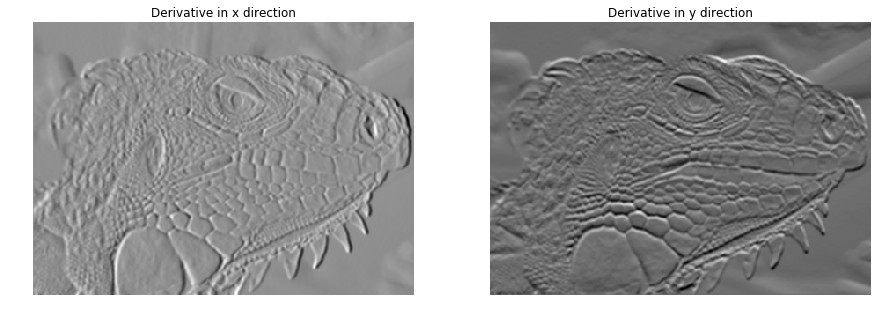

In [30]:
# Compute partial derivatives of smoothed image
Gx = partial_x(smoothed)
Gy = partial_y(smoothed)

plt.subplot(1,2,1)
plt.imshow(Gx)
plt.title('Derivative in x direction')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Gy)
plt.title('Derivative in y direction')
plt.axis('off')

plt.show()

#### Implementation (10 points)
Now, we can compute the magnitude and direction of gradient with the two partial derivatives:

$$
G = \sqrt{G_{x}^{2}+G_{y}^{2}} \\
\Theta = arctan\bigl(\frac{G_{y}}{G_{x}}\bigr)
$$

Implement **`gradient`** in `edge.py` which takes in an image and outputs $G$ and $\Theta$.

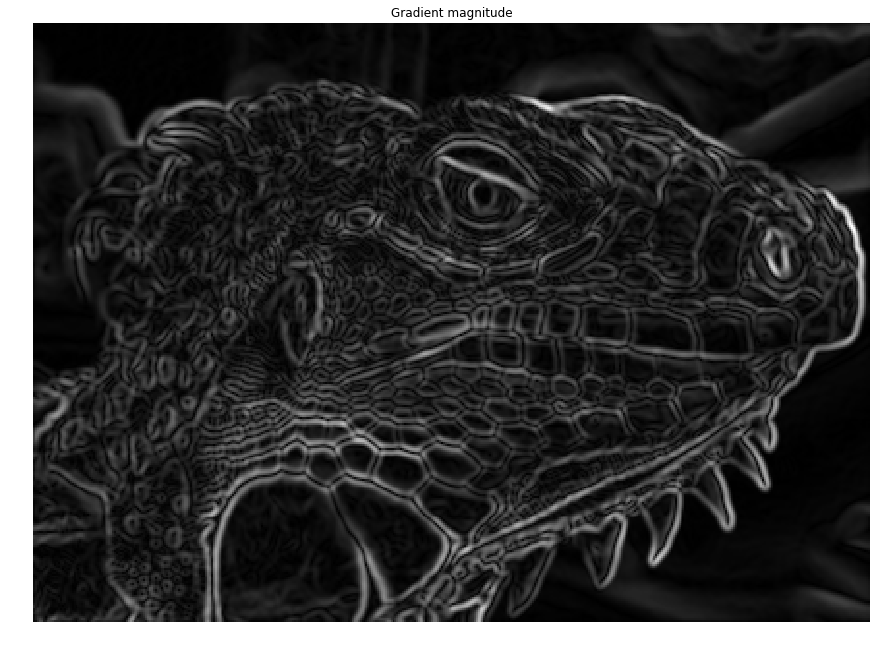

In [31]:
from edge import gradient

G, theta = gradient(smoothed)
# print("theta : ",theta)
# print("G : ",G)
if not np.all(G >= 0):
    print('Magnitude of gradients should be non-negative.')
    
if not np.all((theta >= 0) * (theta < 360)):
    print('Direction of gradients should be in range 0 <= theta < 360')

plt.imshow(G)
plt.title('Gradient magnitude')
plt.axis('off')
plt.show()

### 2.3 Non-maximum suppression (10 points)
You should be able to see that the edges extracted from the gradient of the smoothed image are quite thick and blurry. The purpose of this step is to convert the "blurred" edges into "sharp" edges. Basically, this is done by preserving all local maxima in the gradient image and discarding everything else. The algorithm is for each pixel (x,y) in the gradient image:
1. Round the gradient direction $\Theta[y,x]$ to the nearest 45 degrees, corresponding to the use of an 8-connected neighbourhood.

2. Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions. For example, if the gradient direction is south (theta=90), compare with the pixels to the north and south.

3. If the edge strength of the current pixel is the largest; preserve the value of the edge strength. If not, suppress (i.e. remove) the value.

Implement **`non_maximum_suppression`** in `edge.py`.

We provide the correct output and the difference between it and your result for debugging purposes.  If you see white spots in the Difference image, you should check your implementation.

In [32]:
from edge import non_maximum_suppression

# Test input
g = np.array(
    [[0.4, 0.5, 0.6],
     [0.3, 0.5, 0.7],
     [0.4, 0.5, 0.6]]
)

# Print out non-maximum suppressed output
# varying theta
for angle in range(0, 180, 45):
    #print('Thetas:', angle)
    t = np.ones((3, 3)) * angle # Initialize theta
    print(non_maximum_suppression(g, t))


[[0.  0.  0.6]
 [0.  0.  0.7]
 [0.  0.  0.6]]
[[0.  0.  0.6]
 [0.  0.  0.7]
 [0.4 0.5 0.6]]
[[0.4 0.5 0. ]
 [0.  0.5 0.7]
 [0.4 0.5 0. ]]
[[0.4 0.5 0.6]
 [0.  0.  0.7]
 [0.  0.  0.6]]


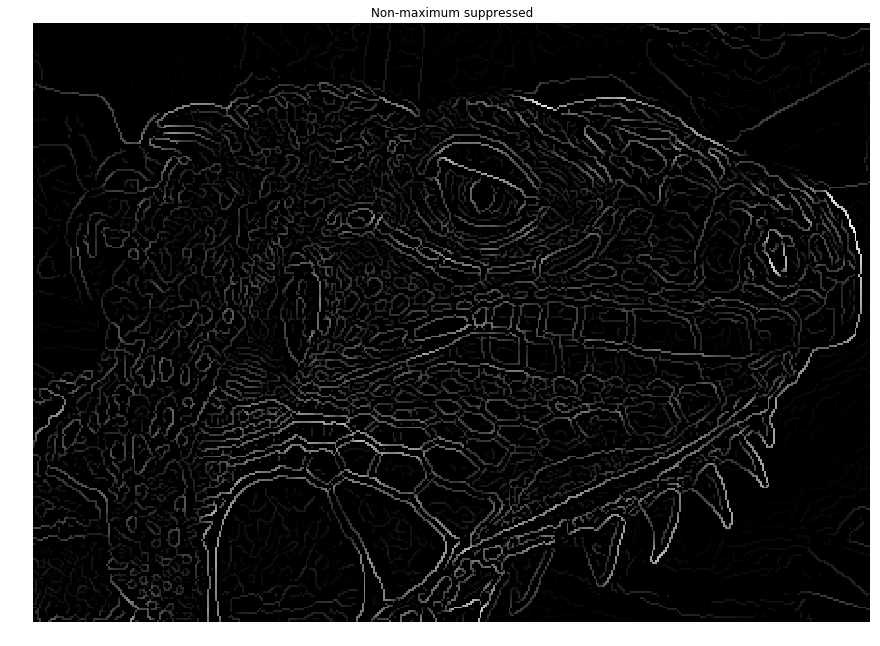

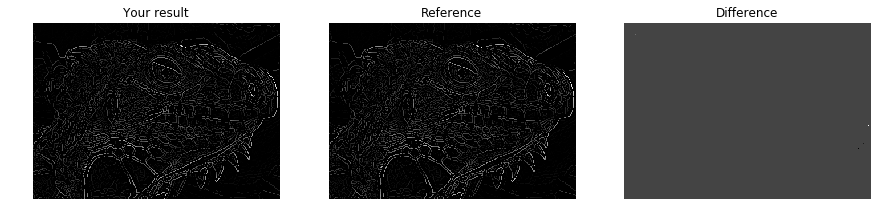

0.004954806714090556

In [33]:
nms = non_maximum_suppression(G, theta)
plt.imshow(nms)
plt.title('Non-maximum suppressed')
plt.axis('off')
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(nms)
plt.axis('off')
plt.title('Your result')

plt.subplot(1, 3, 2)
reference = np.load('references/iguana_non_max_suppressed.npy')
plt.imshow(reference)
plt.axis('off')
plt.title('Reference')

plt.subplot(1, 3, 3)
plt.imshow(nms - reference)
plt.title('Difference')
plt.axis('off')
plt.show()


# print("difference : ",(nms-reference))

np.amax(nms-reference)

### 2.4 Double Thresholding (10 points)

The edge-pixels remaining after the non-maximum suppression step are (still) marked with their strength pixel-by-pixel. Many of these will probably be true edges in the image, but some may be caused by noise or color variations, for instance, due to rough surfaces. The simplest way to discern between these would be to use a threshold, so that only edges stronger that a certain value would be preserved. The Canny edge detection algorithm uses double thresholding. Edge pixels stronger than the high threshold are marked as strong; edge pixels weaker than the low threshold are suppressed and edge pixels between the two thresholds are marked as weak.

Implement **`double_thresholding`** in `edge.py`

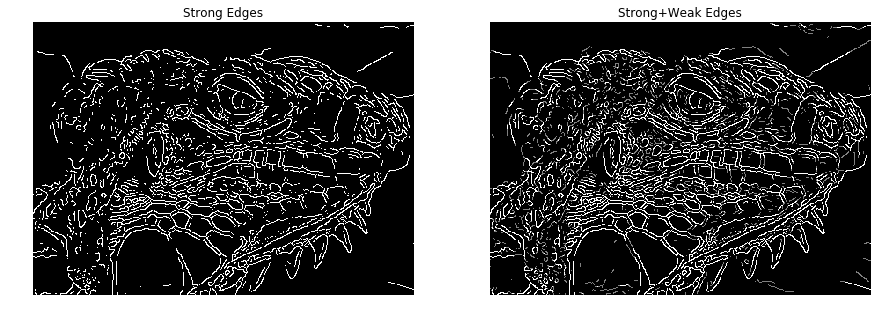

In [34]:
from edge import double_thresholding

low_threshold = 0.02
high_threshold = 0.03

strong_edges, weak_edges = double_thresholding(nms, high_threshold, low_threshold)
assert(np.sum(strong_edges & weak_edges) == 0)

edges=strong_edges * 1.0 + weak_edges * 0.5

plt.subplot(1,2,1)
plt.imshow(strong_edges)
plt.title('Strong Edges')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges)
plt.title('Strong+Weak Edges')
plt.axis('off')

plt.show()

### 2.5 Edge tracking (10 points)

Strong edges are interpreted as “certain edges”, and can immediately be included in the final edge image. Consider its neighbors iteratively then declare it an 'edge pixel' if it is connected to a 'strong edge pixel' directly or via pixels between Low and High. The logic is of course that noise and other small variations are unlikely to result in a strong edge (with proper adjustment of the threshold levels). Thus strong edges will (almost) only be due to true edges in the original image. The weak edges can either be due to true edges or noise/color variations. The latter type will probably be distributed independently of edges on the entire image, and thus only a small amount will be located adjacent to strong edges. Weak edges due to true edges are much more likely to be connected directly to strong edges.

Implement **`link_edges`** in `edge.py`.

We provide the correct output and the difference between it and your result for debugging purposes.  If you see white spots in the Difference image, you should check your implementation.

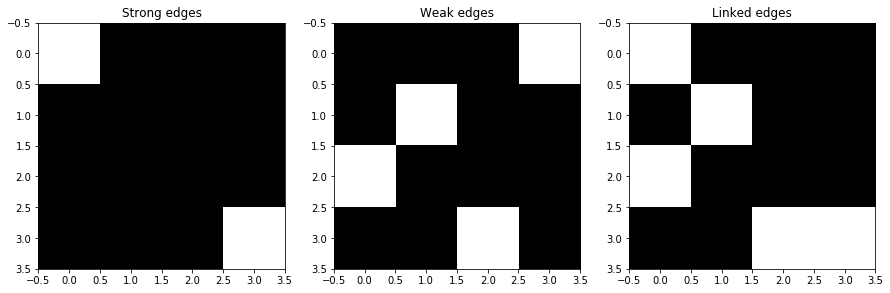

In [35]:
from edge import get_neighbors, link_edges

test_strong = np.array(
    [[1, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 1]],
    # dtype=np.bool
    # change dtype to bool to avoid error
    dtype=bool
)

test_weak = np.array(
    [[0, 0, 0, 1],
     [0, 1, 0, 0],
     [1, 0, 0, 0],
     [0, 0, 1, 0]],
    # dtype=np.bool
    # change dtype to bool to avoid error
    dtype=bool
)

test_linked = link_edges(test_strong, test_weak)

plt.subplot(1, 3, 1)
plt.imshow(test_strong)
plt.title('Strong edges')

plt.subplot(1, 3, 2)
plt.imshow(test_weak)
plt.title('Weak edges')

plt.subplot(1, 3, 3)
plt.imshow(test_linked)
plt.title('Linked edges')
plt.show()

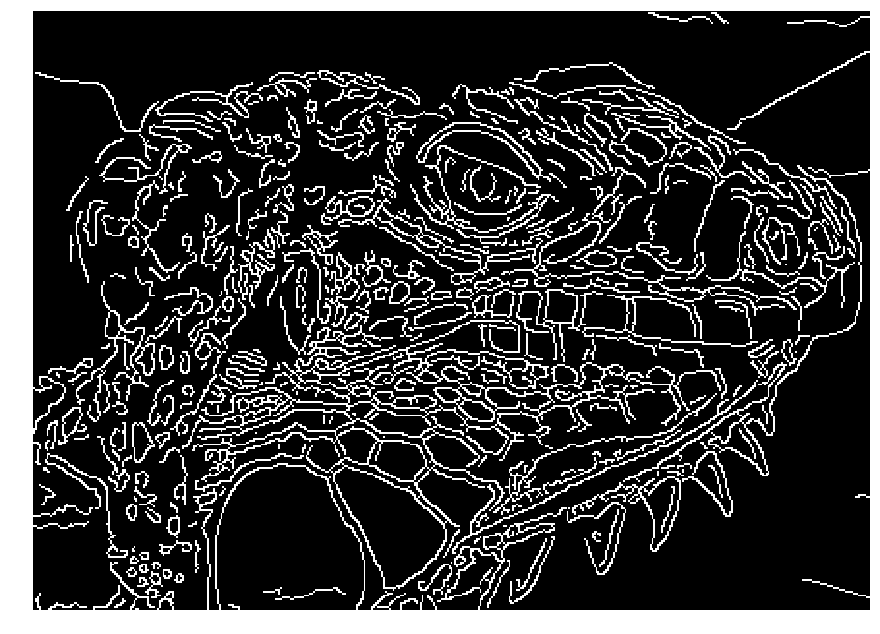

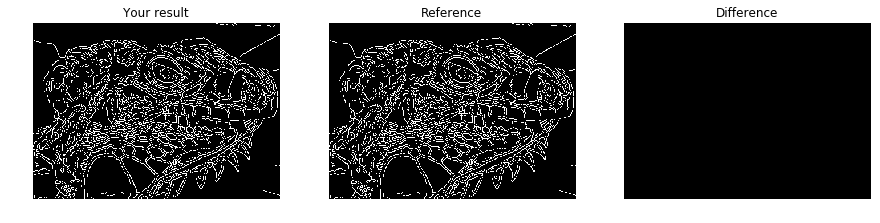

In [13]:
edges = link_edges(strong_edges, weak_edges)

plt.imshow(edges)
plt.axis('off')
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(edges)
plt.axis('off')
plt.title('Your result')

plt.subplot(1, 3, 2)
reference = np.load('references/iguana_edge_tracking.npy')
plt.imshow(reference)
plt.axis('off')
plt.title('Reference')

plt.subplot(1, 3, 3)
plt.imshow(edges ^ reference)
plt.title('Difference')
plt.axis('off')
plt.show()

### 2.6 Canny edge detector (10 points)
Use **`canny`** in `edge.py` using the functions you have implemented so far. Test edge detector with different parameters.

Here is an example of the output:

![iguana_edges.png](iguana_edges.png)

We provide the correct output and the difference between it and your result for debugging purposes.  If you see white spots in the Difference image, you should check your implementation.

(310, 433)


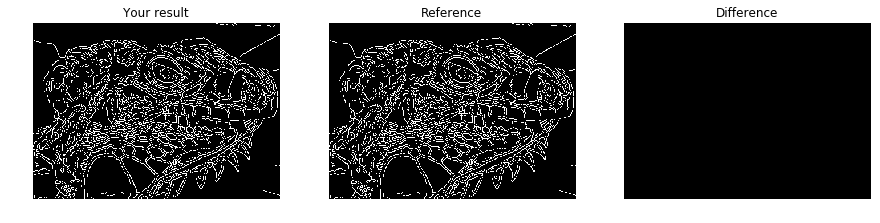

In [36]:
from edge import canny

# Load image
img = io.imread('iguana.png', as_gray=True)

# Run Canny edge detector
edges = canny(img, kernel_size=5, sigma=1.4, high=0.03, low=0.02)
print (edges.shape)

plt.subplot(1, 3, 1)
plt.imshow(edges)
plt.axis('off')
plt.title('Your result')

plt.subplot(1, 3, 2)
reference = np.load('references/iguana_canny.npy')
plt.imshow(reference)
plt.axis('off')
plt.title('Reference')

plt.subplot(1, 3, 3)
plt.imshow(edges ^ reference)
plt.title('Difference')
plt.axis('off')
plt.show()

### 1.7 Question (10 points)

![1.7a.png](1.7a.png)
**(a)** Suppose that the Canny edge detector successfully detects an edge in an image. The edge (see the figure above) is then rotated by θ, where the relationship between a point on the original edge $(x, y)$ and a point on the rotated edge $(x', y')$ is defined as

$$
x'=x\cos{\theta}\\
y'=x\sin{\theta}
$$

Will the rotated edge be detected using the same Canny edge detector? Provide either a mathematical proof or a counter example.

*-Hint 1: The detection of an edge by the Canny edge detector depends only on the magnitude of its derivative. The derivative at point (x, y) is determined by its components along the x and y directions. Think about how these magnitudes have changed because of the rotation.* <br>
*-Hint 2: You can assume that (x,y) lies on the x-axis, i.e., y = 0. * <br>
*-Hint 3: You can also assume that G_x(x, y) = 0. In other words, the gradient which is perpendicular to the direction of the unrotated edge at (x, y) only has a vertical component and thus only consists of G_y(x, y).*

**Your Answer:**
> 旋转后的边缘可以用相同的Canny边缘检测器检测到。
>
>原导数的大小为：
>
>$$ |\nabla f| = \sqrt{{G_x}^2 + {G_y}^2} $$
>
>原坐标(x,y)经变换之后的坐标(x',y')有：
>
>$$ x' = x \cos \theta - y \sin \theta $$
>
>$$ y' = x \sin \theta + y \cos \theta $$
>
>沿x和y方向的导数经变换后为：
>
>$$ G'_x = G_x \cos \theta - G_y \sin \theta $$
>
>$$ G'_y = G_x \sin \theta + G_y \cos \theta $$
>
>变换之后的导数的大小为：
>
>$$
\begin{align}
|\nabla f'| &= \sqrt{{G'_x}^2 + {G'_y}^2} \\
&= \sqrt{( G_x \cos \theta - G_y \sin \theta)^2 + (G_x \sin \theta + G_y \cos \theta)^2} \\
&= \sqrt{G_x^2 \cos^2 \theta+ G_y^2 \sin^2 \theta-2G_x\cos\theta G_y\sin\theta+G_x^2 \sin^2 \theta + G_y^2 \cos^2 \theta+2G_x\sin\theta G_y\cos\theta} \\
&= \sqrt{G_x^2 (\cos^2 \theta + \sin^2 \theta)+G_y^2 (\sin^2 \theta + \cos^2 \theta)}\\
&= \sqrt{{G_x}^2 + {G_y}^2}\\
&= |\nabla f| \\
\end{align}
$$
>
>由于Canny边缘检测器对边缘的检测仅取决于其导数的大小，而变换后的导数大小等于原导数的大小，故旋转后的边缘可以用相同的Canny边缘检测器检测到。

**(b)** After running the Canny edge detector on an image, you notice that long edges are broken into short segments separated by gaps. In addition, some spurious edges appear. For each of the two thresholds (low and high) used in hysteresis thresholding, explain how you would adjust the threshold (up or down) to address both problems. Assume that a setting exists for the two thresholds that produces the desired result. Briefly explain your answer.

**Your Answer:** 
>1.当长边断成小段时，是因为low阈值设置较高，导致只有较强部分超过阈值，而较弱但有效的部分没有超过阈值而被抑制。此时应当降低low阈值。
>
>2.当出现假边时，是因为high阈值设置较低，可能导致一些噪声被错误地分类为弱边，从而连接到强边，保留在输出中。此时应当提高high阈值。